In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model


In [2]:
data_dir = r"C:\Users\isame\Downloads\Date_Fruit_Image_Dataset_Splitted_Train\train"
data_path = pathlib.Path(data_dir)
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size) 

Found 1156 files belonging to 9 classes.
Using 925 files for training.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 1156 files belonging to 9 classes.
Using 231 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['Ajwa', 'Galaxy', 'Mejdool', 'Meneifi', 'NabtatAli', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']


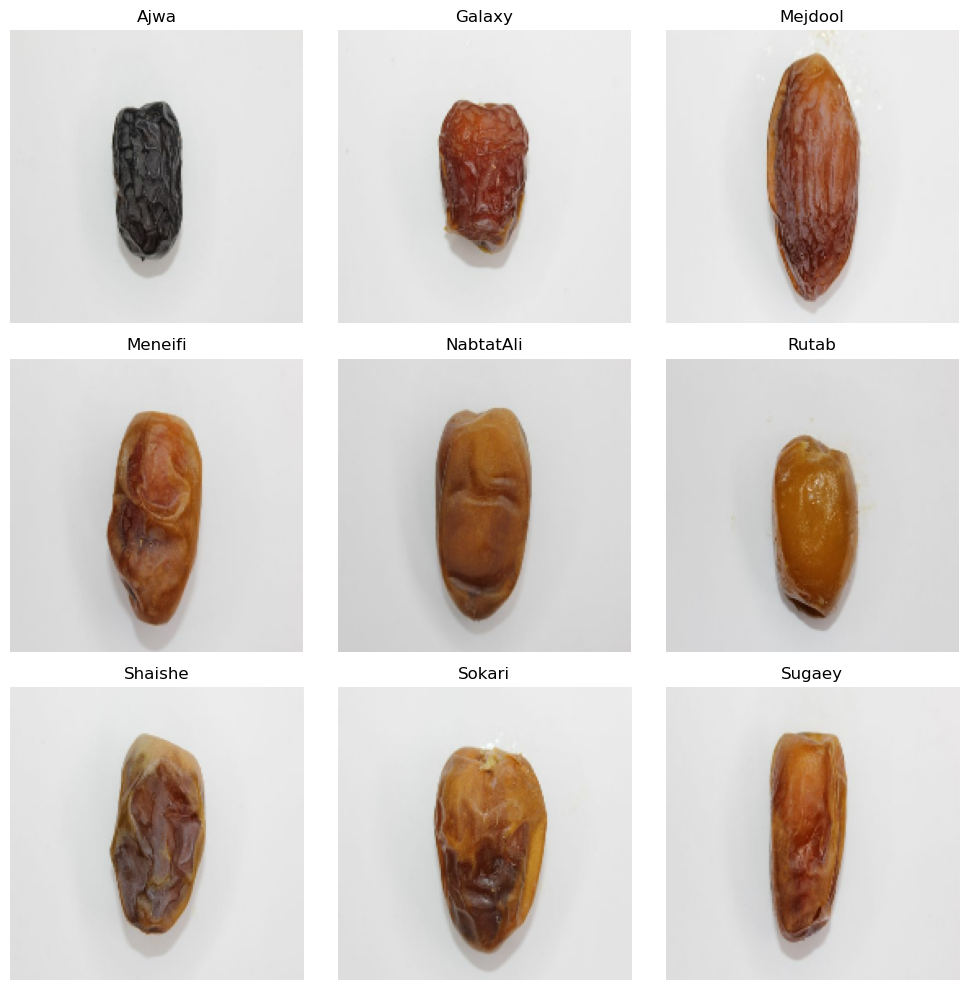

In [5]:
plt.figure(figsize=(10, 10))
samples_per_class = len(class_names)

for i, class_name in enumerate(class_names):
    for images, labels in train_ds:
        for image, label in zip(images, labels):
            if label == i:
                plt.subplot(3, 3, i + 1)
                plt.imshow(image.numpy().astype("uint8"))
                plt.title(class_name)
                plt.axis("off")
                break
        else:
            continue
        break

plt.tight_layout()
plt.show()

In [6]:
Autotune = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=Autotune)
val_ds = val_ds.cache().prefetch(buffer_size=Autotune)

In [7]:
inputs = Input(shape=(img_height, img_width, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)

x = Conv2D(16, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
outputs = Dense(len(class_names))(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Found 1156 files belonging to 9 classes.


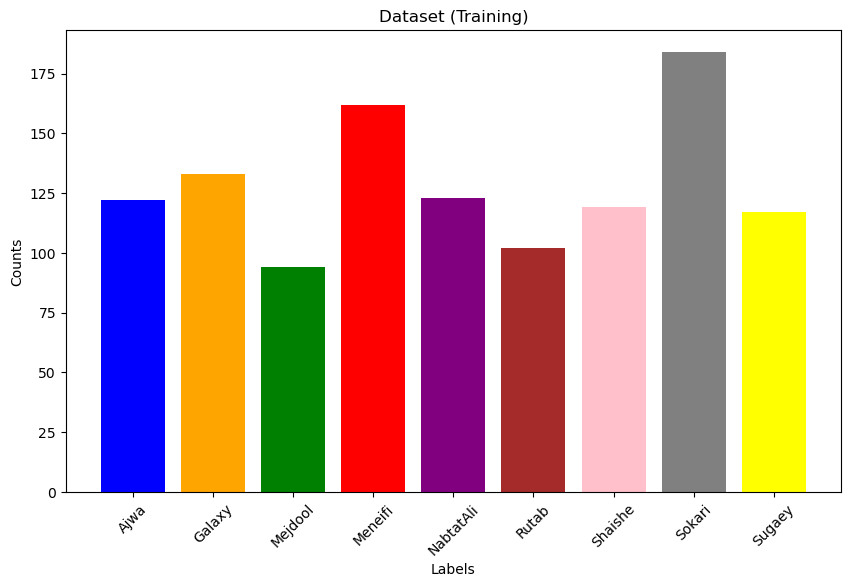

Epoch 1/10
37/37 [==============================] - 12s 286ms/step - loss: 2.1616 - accuracy: 0.2284 - val_loss: 1.6827 - val_accuracy: 0.3074
Epoch 2/10
37/37 [==============================] - 9s 250ms/step - loss: 1.3334 - accuracy: 0.5156 - val_loss: 1.2569 - val_accuracy: 0.5931
Epoch 3/10
37/37 [==============================] - 10s 263ms/step - loss: 0.8290 - accuracy: 0.7085 - val_loss: 0.8460 - val_accuracy: 0.6970
Epoch 4/10
37/37 [==============================] - 9s 241ms/step - loss: 0.6452 - accuracy: 0.7699 - val_loss: 0.5601 - val_accuracy: 0.8052
Epoch 5/10
37/37 [==============================] - 9s 238ms/step - loss: 0.4544 - accuracy: 0.8607 - val_loss: 0.4280 - val_accuracy: 0.8442
Epoch 6/10
37/37 [==============================] - 9s 237ms/step - loss: 0.4198 - accuracy: 0.8555 - val_loss: 0.3751 - val_accuracy: 0.8874
Epoch 7/10
37/37 [==============================] - 9s 243ms/step - loss: 0.3025 - accuracy: 0.8979 - val_loss: 0.3963 - val_accuracy: 0.8528
Epoc

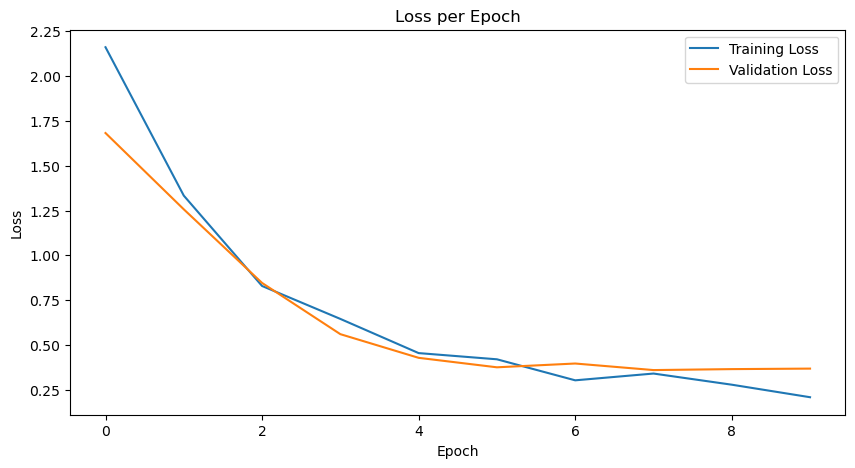

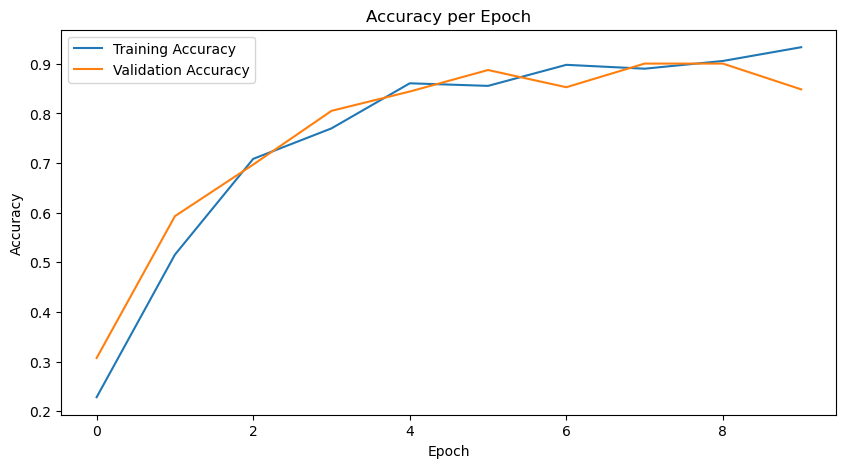

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)


train_class_counts = {class_name: 0 for class_name in class_names}


for images, labels in train_ds:
    labels = labels.numpy()  
    for label in labels:
        class_name = class_names[label]  
        train_class_counts[class_name] += 1


labels = list(train_class_counts.keys())
counts = list(train_class_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow'])
plt.title('Dataset (Training)')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=45)  
plt.show()

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

In [10]:
test_dir = r"C:\Users\isame\Downloads\Date_Fruit_Image_Dataset_Splitted_Test\test"
test_ds = image_dataset_from_directory(test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)
class_counts = {class_name: 0 for class_name in class_names}


for images, labels in test_ds:
    labels = labels.numpy() 
    for label in labels:
        class_name = class_names[label]  
        class_counts[class_name] += 1


print(class_counts)


Found 502 files belonging to 9 classes.
{'Ajwa': 53, 'Galaxy': 57, 'Mejdool': 41, 'Meneifi': 70, 'NabtatAli': 54, 'Rutab': 44, 'Shaishe': 52, 'Sokari': 80, 'Sugaey': 51}


Found 502 files belonging to 9 classes.
16/16 [==============================] - 1s 74ms/step - loss: 0.6741 - accuracy: 0.7689
Test Accuracy: 0.7689242959022522


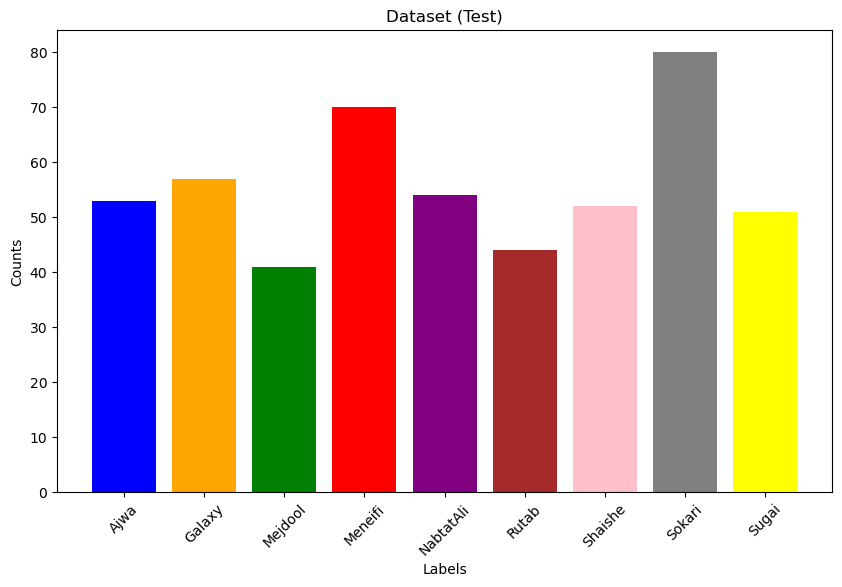

16/16 [==============================] - 1s 72ms/step
Classification Report:
               precision    recall  f1-score   support

        Ajwa       0.93      1.00      0.96        53
      Galaxy       1.00      0.56      0.72        57
     Mejdool       0.97      0.88      0.92        41
     Meneifi       0.70      0.81      0.75        70
   NabtatAli       0.46      0.89      0.60        54
       Rutab       1.00      0.61      0.76        44
     Shaishe       0.98      0.92      0.95        52
      Sokari       0.75      0.91      0.82        80
      Sugaey       0.75      0.24      0.36        51

    accuracy                           0.77       502
   macro avg       0.84      0.76      0.76       502
weighted avg       0.82      0.77      0.76       502



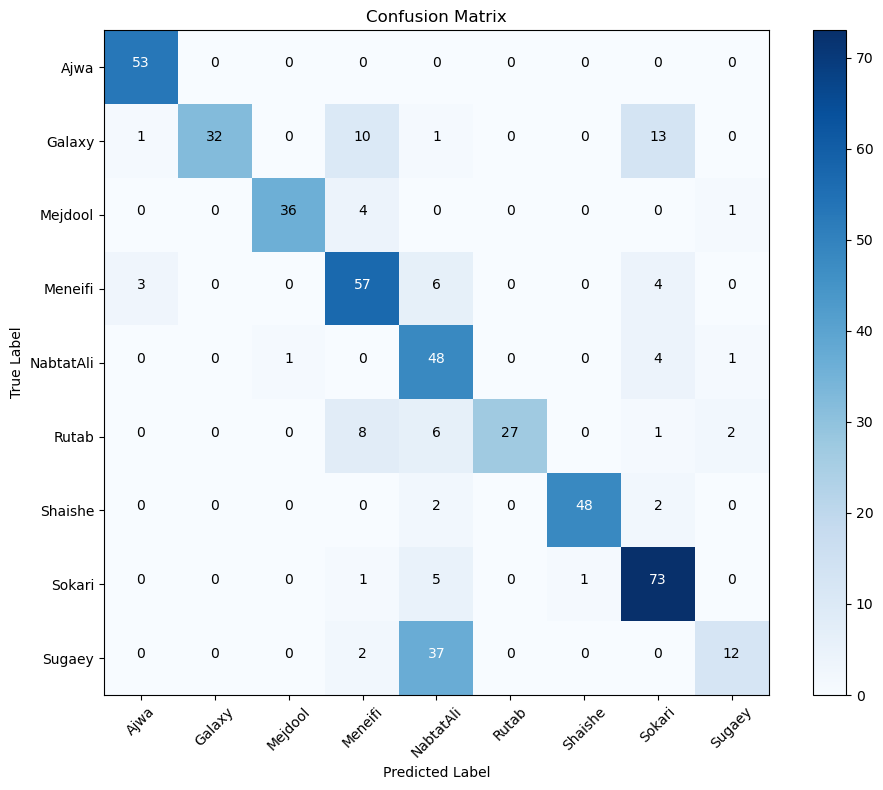

In [11]:
test_ds = image_dataset_from_directory(test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  
)


test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Accuracy:", test_accuracy)

counts_per_class = {
    'Ajwa': 53, 'Galaxy': 57, 'Mejdool': 41, 'Meneifi': 70,
    'NabtatAli': 54, 'Rutab': 44, 'Shaishe': 52, 'Sokari': 80, 'Sugai': 51 }

labels = counts_per_class.keys()
counts = counts_per_class.values()

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow'])
plt.title('Dataset (Test)')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=45) 
plt.show()


test_pred = model.predict(test_ds)
test_labels = np.concatenate([labels.numpy() for _, labels in test_ds], axis=0)
test_pred_labels = np.argmax(test_pred, axis=1)


classification_rep = classification_report(test_labels, test_pred_labels, target_names=class_names)
print("Classification Report:\n", classification_rep)


confusion_mtx = confusion_matrix(test_labels, test_pred_labels)

plt.figure(figsize=(10, 8))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.show()